In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd


In [5]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func,and_, extract

In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [13]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [14]:
columns = inspector.get_columns('measurement')
columns
for c in columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [15]:
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [18]:
# Latest Date
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date

('2017-08-23')

In [33]:
# date 1 week ago from today
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

In [38]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

sel = [Measurement.date, 
       func.sum(Measurement.prcp)]

query1 = session.query(*sel).filter(and_(func.date(Measurement.date) >= year_ago),\
   func.date(Measurement.date) <= 'latest_date').group_by(Measurement.date).order_by(Measurement.date.desc()).all()
query1

[('2017-08-23', 0.53),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.5800000000000001),
 ('2017-08-20', 0.01),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.06),
 ('2017-08-17', 0.19),
 ('2017-08-16', 0.61),
 ('2017-08-15', 0.8200000000000001),
 ('2017-08-14', 0.31),
 ('2017-08-13', 0.0),
 ('2017-08-12', 0.14),
 ('2017-08-11', 0.0),
 ('2017-08-10', 0.07),
 ('2017-08-09', 0.15),
 ('2017-08-08', 0.44000000000000006),
 ('2017-08-07', 0.05),
 ('2017-08-06', 0.0),
 ('2017-08-05', 0.06),
 ('2017-08-04', 0.06),
 ('2017-08-03', 0.06999999999999999),
 ('2017-08-02', 0.3),
 ('2017-08-01', 0.13999999999999999),
 ('2017-07-31', 0.0),
 ('2017-07-30', 0.3),
 ('2017-07-29', 0.61),
 ('2017-07-28', 0.77),
 ('2017-07-27', 0.01),
 ('2017-07-26', 0.5),
 ('2017-07-25', 0.61),
 ('2017-07-24', 3.2699999999999996),
 ('2017-07-23', 1.1300000000000001),
 ('2017-07-22', 4.42),
 ('2017-07-21', 0.13),
 ('2017-07-20', 1.24),
 ('2017-07-19', 0.41000000000000003),
 ('2017-07-18', 2.53),
 ('2017-07-17', 0.91),
 ('2017-07-16', 0.

In [50]:
 # Export file as a CSV, without the Pandas index, but with the header
#measurement_df.to_csv("Output/query1.csv", index=True, header=True)

In [40]:
columns = inspector.get_columns('station')
columns
for c in columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [41]:
stations = session.query(Station.id,Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation)

In [70]:
station_df.describe()

,latitude,longitude,elevation
count,9.000000,9.000000,9.000000
mean,21.393826,-157.867098,60.977778
std,0.086442,0.103873,103.465547
min,21.271600,-158.011100,0.900000
25%,21.333100,-157.975100,7.000000
50%,21.393400,-157.837400,14.600000
75%,21.451670,-157.802500,32.900000
max,21.521300,-157.711390,306.600000


In [69]:
station_df = pd.DataFrame(stations[:10], columns=['id','station', 'name', 'latitude', 'longitude', 'elevation'])
station_df.set_index('id', inplace=True, )
station_df.head(10)

,station,name,latitude,longitude,elevation
id,,,,,
1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [43]:
results = session.query(Measurement.date, Measurement.prcp)
results

In [73]:
measurement1 = session.query(Measurement.date, Measurement.prcp)

In [45]:
measurement_df = pd.DataFrame(query1, columns=['date','prcp'])
measurement_df.set_index('date', inplace=True, )
measurement_df.head()

,prcp
date,
2017-08-23,0.53
2017-08-22,0.50
2017-08-21,0.58
2017-08-20,0.01
2017-08-19,0.09


fig, ax = plt.subplots()
ypos = range(1, len(prcp)+1)
ax.barh(ypos, scores[::-1])
ax.set_xlabel("date")
ax.set_ylabel("precipitation")
ax.set_yticks(ypos)
ax.set_yticklabels(emoji_id[::-1])
ax.set_title("Last 12 months of precipitation")
fig.tight_layout()
plt.show()


In [46]:
 # Load the results into a pandas dataframe. Set the index to the 'date'
df = pd.DataFrame(query1, columns=['date', 'precipitation'])
df.set_index('date', inplace=True, )
df.head()

,precipitation
date,
2017-08-23,0.53
2017-08-22,0.50
2017-08-21,0.58
2017-08-20,0.01
2017-08-19,0.09


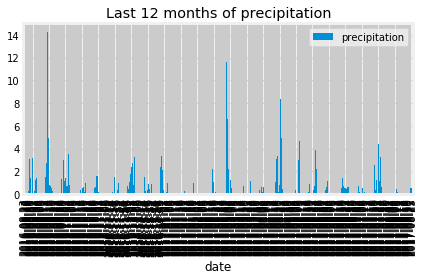

In [49]:
# Plot the dataframe as a horizontal bar chart using pandas plotting
df.iloc[::-1].plot.bar(title="Last 12 months of precipitation")
plt.tight_layout()
plt.show()

![precipitation](Images/precipitation.png)

In [83]:
# Use Pandas to calculate the summary statistics for the precipitation data
query2 = session.query(Measurement.date, Measurement.prcp).filter(and_(func.date(Measurement.date) >= year_ago),\
   func.date(Measurement.date) <= 'latest_date').all()

measurement_df2 = pd.DataFrame(query2, columns=['date','prcp'])
measurement_df2.set_index('date', inplace=True, )

measurement_df2.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [84]:
# Design a query to show how many stations are available in this dataset?  ok
engine.execute('SELECT count (station) from station').fetchall()


[(9,)]

In [96]:
# Design a query to show stations names available in this dataset - Station Table ok
engine.execute('SELECT distinct station FROM Station').fetchall()

[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]

In [95]:
# Design a query to show stations names available in this dataset - Measurement Table ok
engine.execute('SELECT distinct station FROM Measurement').fetchall()

[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]

In [131]:
# What are the most active stations? (i.e. what stations have the most rows)? 
sel1 = [Measurement.station, 
       func.count(Measurement.prcp)]

active_stations = session.query(*sel1).group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [120]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

qry = session.query(func.min(Measurement.tobs),
                    func.max(Measurement.tobs),
                    func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
qry

[(54.0, 85.0, 71.66378066378067)]

In [130]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

sel3 = [Measurement.station, 
       func.count(Measurement.tobs)]

observations = session.query(*sel3).order_by(func.count(Measurement.tobs).desc()).group_by(Measurement.station).all()
observations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [155]:
sel4 = [func.sum(Measurement.tobs)]

USC0051928 = session.query(*sel4).filter(and_(func.date(Measurement.date) >= year_ago),\
   func.date(Measurement.date) <= 'latest_date').group_by(Measurement.date).order_by(Measurement.date.desc()).filter(Measurement.station == 'USC00519281').all()
x = USC0051928

In [ ]:
# the histogram of the data
%matplotlib inline
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.xlim(40, 160)
plt.ylim(0, 60)
plt.grid(True)
plt.show()

In [ ]:
%matplotlib inline
plt.hist(x,density=True, bins=12) 
plt.axis([60, 85, 0, 60]) 
#axis([xmin,xmax,ymin,ymax])
plt.xlabel('Frequency')
plt.ylabel('tobs')
plt.show()

In [ ]:
num_bins = 5
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [97]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
